# Workshop 4: Programming in Jupyter Python Notebooks

## Learning Outcomes

- Gain familiarity with basic string manipulation functions in Python
- Import data from files
- Understand basic Python for and while loops, including indentation syntax
- Understand basic Python if statements

# Manipulating data to produce useful information

Modern science and modern life produces lots of data. 

Often this data comes in complicated text files that need to be processed to a useful internal format within the computer. 

For example, within the Chemistry department you have data like: 
- computational chemistry output files
- instrument output files - e.g. mass spectrometry, UV-visible spectroscopy, X-ray crystallography
- student data

Within the broader population, you have data like: 
- customer orders - e.g. online retailer, supermarket
- health data
- weather data
- financial data
- demographic data
- social media data
- websites 

Skills in programming are in very high demand by employees because we are in a big data and big information age. Good information leads to better outcomes - e.g. profit, improved health etc. 

Python is arguably the leading programming languages for data manipulation because of the ease and flexibility of its file handling and text processing tools. (Note: R is very popular with statistical information).  

In this workshop, we will be learning the basics of how to import and process this data, then apply this to computational chemistry output files. 

# A) Processing simple tabular data

From Workshop 3, we had the table: 

|Element| $Z_{eff}$ | $c_1$     | $n$  | $c_2$   | $\alpha$       |
|----|------|--------------|----|--------------|-------------|
| Li | 2.69 | 0.2730262183 |  4 | 0.8163954599 | 1.526017431 |
| Be | 3.68 | 0.3622450889 |  5 | 0.7272642323 | 2.463572762 |
| B  | 4.68 | 0.4360306876 |  6 | 0.6492041387 | 3.587269047 |
| C  | 5.67 | 0.4938827304 |  7 | 0.5856474836 | 4.896756543 |
| N  | 6.67 | 0.5427120233 |  8 | 0.5310134749 | 6.401889787 |
| O  | 7.66 | 0.5816851812 |  9 | 0.4866186707 | 8.101958121 |
| F  | 8.65 | 0.6144117594 | 10 | 0.4489925087 | 10.00106287 |
| Ne | 9.64 |  0.642248393 | 11 | 0.4167850089 | 12.10057083 |

Many of you asked me if we could get this data more efficiently than manually copying and pasting individual values. In this exercise, we will do this. 


Start by copying and pasting the above into a spreadsheet program like Excel or Google sheets. Export as a csv file, saved as `Example1.csv`. 

You may want to edit the column headings to simplify.

In [1]:
file = open('Example1.csv','r') # opens text file for reading
lines = file.readlines()    # puts all the lines in file in a list
file.close()                # closes file
print(lines)                # print list

['\ufeffElement,Zeff,c1,n,c2,a\n', 'Li,2.69,0.273026218,4,0.81639546,1.526017431\n', 'Be,3.68,0.362245089,5,0.727264232,2.463572762\n', 'B,4.68,0.436030688,6,0.649204139,3.587269047\n', 'C,5.67,0.49388273,7,0.585647484,4.896756543\n', 'N,6.67,0.542712023,8,0.531013475,6.401889787\n', 'O,7.66,0.581685181,9,0.486618671,8.101958121\n', 'F,8.65,0.614411759,10,0.448992509,10.00106287\n', 'Ne,9.64,0.642248393,11,0.416785009,12.10057083']


This is not very useful yet; we are using the wrong tool for this job. 

Fortunately, there are simpler packages to deal with well structured 2D data like this.

In [2]:
import pandas as pd

df = pd.read_csv('Example1.csv')
df

,Element,Zeff,c1,n,c2,a
0,Li,2.69,0.273026,4,0.816395,1.526017
1,Be,3.68,0.362245,5,0.727264,2.463573
2,B,4.68,0.436031,6,0.649204,3.587269
3,C,5.67,0.493883,7,0.585647,4.896757
4,N,6.67,0.542712,8,0.531013,6.401890
5,O,7.66,0.581685,9,0.486619,8.101958
6,F,8.65,0.614412,10,0.448993,10.001063
7,Ne,9.64,0.642248,11,0.416785,12.100571


We want to name each row by the element number rather than the generic 0 - 7. We can do this using `set_index` like in the following code.

In [3]:
df.set_index('Element',inplace=True)
df

,Zeff,c1,n,c2,a
Element,,,,,
Li,2.69,0.273026,4,0.816395,1.526017
Be,3.68,0.362245,5,0.727264,2.463573
B,4.68,0.436031,6,0.649204,3.587269
C,5.67,0.493883,7,0.585647,4.896757
N,6.67,0.542712,8,0.531013,6.401890
O,7.66,0.581685,9,0.486619,8.101958
F,8.65,0.614412,10,0.448993,10.001063
Ne,9.64,0.642248,11,0.416785,12.100571


You can find individual columns and rows using the following syntax.

In [4]:
df.loc[:,['Zeff']]

,Zeff
Element,
Li,2.69
Be,3.68
B,4.68
C,5.67
N,6.67
O,7.66
F,8.65
Ne,9.64


In [5]:
df.loc[['Be'],:]

,Zeff,c1,n,c2,a
Element,,,,,
Be,3.68,0.362245,5,0.727264,2.463573


In [6]:
df.loc[['Be'],['c1']]

,c1
Element,
Be,0.362245


In [7]:
df.loc[['C','O'],['c1','c2']]

,c1,c2
Element,,
C,0.493883,0.585647
O,0.581685,0.486619


This syntax is useful for getting subsets of data. 

We can also get a pure value by excluding the second set of square brackets. 

In [8]:
df.loc['Be','c1']

0.36224508899999996

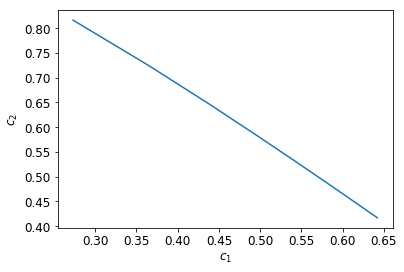

In [26]:
import matplotlib.pyplot as plt
import numpy as np

df.plot(x='c1',y='c2',legend=None)
plt.xlabel('$c_1$')
plt.ylabel('$c_2$')
plt.show()

Recall that these coefficients etc were the values in the functions:

**Slater:** $\chi_S(r) = exp(-Z_{eff}*r)$

**Ramp-Gaussian:** $\chi_R(r) = 0.282095*c_1*\sqrt{(1+n)(1+2n)(3+2n)}*(1-r)^n + 0.712705*c_2 *\alpha^{3/4}exp(-\alpha r^2)$

We can start by plotting a Slater function for Li.
To do this, we need to identify the relevant entry in the dataframe (df), then convert it to a floating point number. 

In [10]:
df.loc['Li','Zeff']

2.69

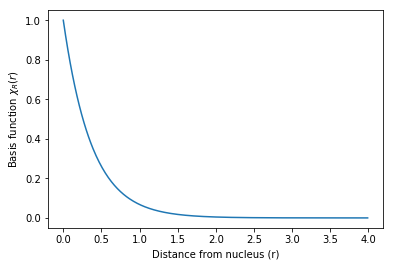

In [11]:
import numpy as np 
r = np.arange(0,4,0.01)
alpha = df.loc['Li','Zeff']
RampGauss_Li = np.exp(-alpha*r)
plt.plot(r,RampGauss_Li)
plt.xlabel('Distance from nucleus (r)')
plt.ylabel(r'Basis function $\chi_R(r)$')
plt.show()


We might want to show multiple basis functions in the same plot. 

To achieve this, we will need to use a `for` loop. A `for` loop is the way that a program does a task repeatedly a number of times. 

In this example, we are cycling through elements in a list - literally elements in this example. Later on, we will see examples where you loop over a range. 

In [12]:
for el in ['Li','Be','B','C','N','O','F']:
    alpha=df.loc[el,'Zeff']
    print(alpha)

2.69
3.68
4.68
5.67
6.67
7.66
8.65


Then we can plot our various basis functions and see how our basis function changes as our nuclear charge increases.

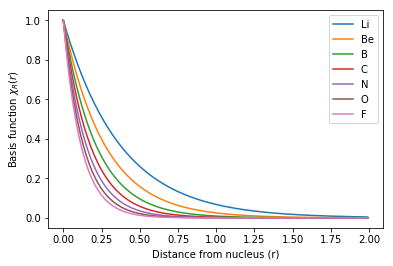

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
r = np.arange(0,2,0.01)
for el in ['Li','Be','B','C','N','O','F']:
    alpha=df.loc[el,'Zeff']
    RampGauss = np.exp(-alpha*r)
    plt.plot(r,RampGauss,label=el)
plt.xlabel('Distance from nucleus (r)')
plt.ylabel(r'Basis function $\chi_R(r)$')
plt.legend()
plt.show()

This plot is getting a bit tricky to read. By adding two lines, we can make the figure bigger and increase the font size, significantly improving readability. 

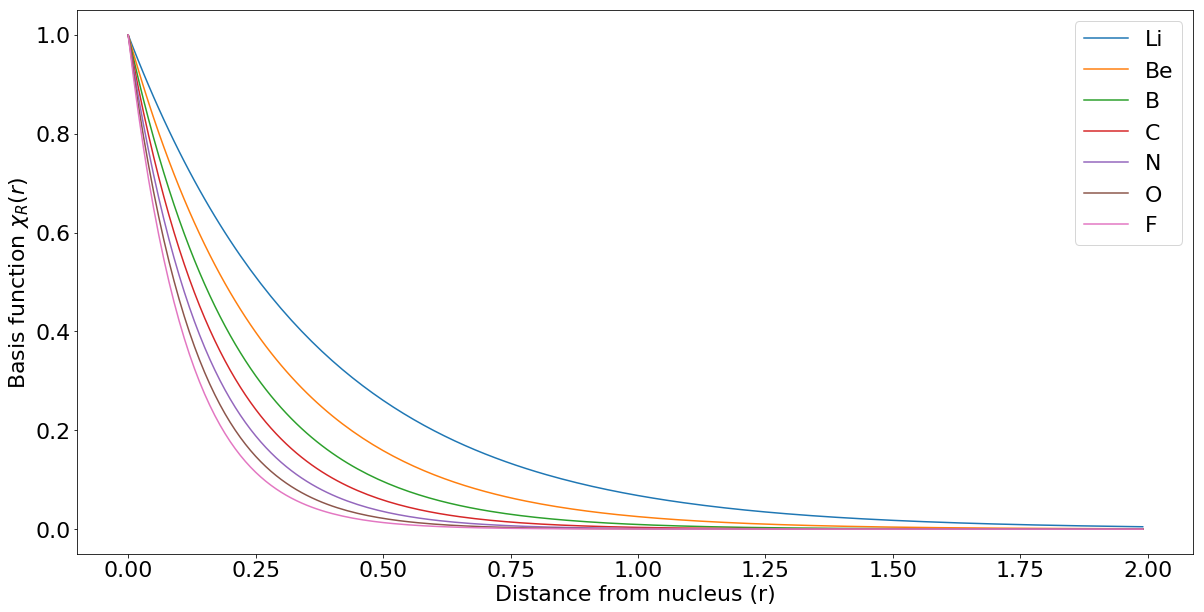

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

###
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
###

r = np.arange(0,2,0.01)
for Element in ['Li','Be','B','C','N','O','F']:
    alpha=df.loc[Element,'Zeff']
    RampGauss = np.exp(-alpha*r)
    plt.plot(r,RampGauss,label=Element)
plt.xlabel('Distance from nucleus (r)')
plt.ylabel(r'Basis function $\chi_R(r)$')
plt.legend()
plt.show()


plt.rcParams.update({'font.size': 12})


Note our basis functions so far are not optimised. To optimise our basis functions, we can pre-multiply by 0.56419*$\alpha^{3/2}$.

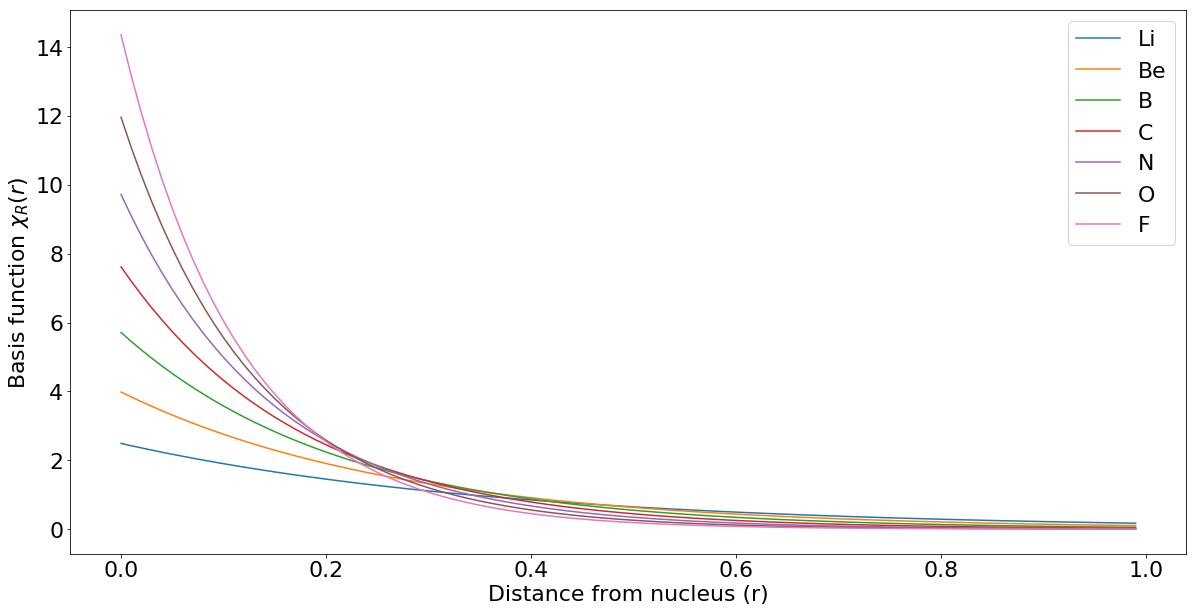

In [15]:
import numpy as np 
import matplotlib.pyplot as plt

###
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
###

r = np.arange(0,1,0.01)
for Element in ['Li','Be','B','C','N','O','F']:
    alpha=df.loc[Element,'Zeff']
    RampGauss = 0.56419*alpha**(3/2)*np.exp(-alpha*r)
    plt.plot(r,RampGauss,label=Element)
plt.xlabel('Distance from nucleus (r)')
plt.ylabel(r'Basis function $\chi_R(r)$')
plt.legend()
plt.show()


plt.rcParams.update({'font.size': 12})

We may also want to plot the probability function, i.e. $4\Pi r^2 \chi_R(r)^2$. To do this, we will need to import math and use math.pi.

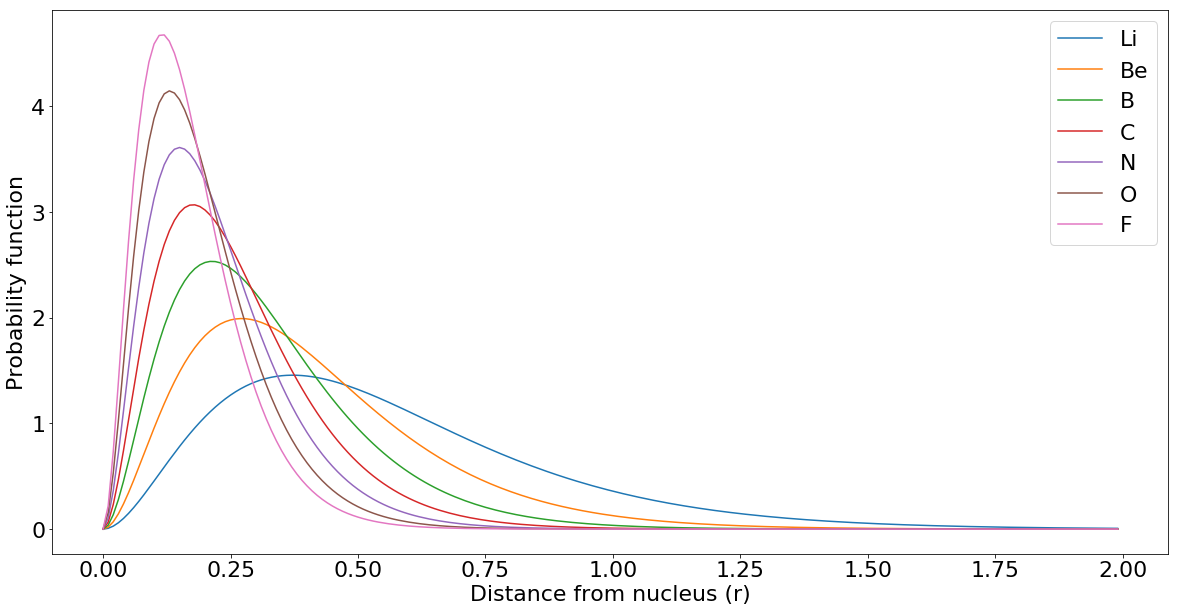

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import math
###
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
###

r = np.arange(0,2,0.01)
for Element in ['Li','Be','B','C','N','O','F']:
    alpha=df.loc[Element,'Zeff']
    RampGauss = 0.56419*alpha**(3/2)*np.exp(-alpha*r)
    plt.plot(r,4*math.pi*r**2*RampGauss**2,label=Element)
plt.xlabel('Distance from nucleus (r)')
plt.ylabel(r'Probability function')
plt.legend()
plt.show()


plt.rcParams.update({'font.size': 12})

### Exercise: 
1) Plot the Ramp-Gaussian functions using similar methodologies. 

2) What is the difference between the Ramp-Gaussian and Slater functions for carbon? 

# B) Processing complex text files

Download `C2H6_opt.out` from Moodle and make sure you have the file in the same folder as this notebook.

In [28]:
file = open('C2H6_opt.out','r') # opens file for reading
lines = file.readlines()    # puts all the lines in file in a list
file.close()                # closes file
print(lines)                # print list

['\n', 'Running Job 1 of 1 input\n', 'qchem input_26196.0 /scratch/qchem26196/ 0\n', '/home/epif/aimm/qcprog.exe_s input_26196.0 /scratch/qchem26196/\n', '8388608\n', '                  Welcome to Q-Chem\n', '     A Quantum Leap Into The Future Of Chemistry\n', '\n', '\n', ' Q-Chem 5.2, Q-Chem, Inc., Pleasanton, CA (2019)\n', '\n', ' Yihan Shao,  Zhengting Gan,  E. Epifanovsky,  A. T. B. Gilbert,  M. Wormit,  \n', ' J. Kussmann,  A. W. Lange,  A. Behn,  Jia Deng,  Xintian Feng,  D. Ghosh,  \n', ' M. Goldey,  P. R. Horn,  L. D. Jacobson,  I. Kaliman,  T. Kus,  A. Landau,  \n', ' Jie Liu,  E. I. Proynov,  R. M. Richard,  R. P. Steele,  E. J. Sundstrom,  \n', ' H. L. Woodcock III,  P. M. Zimmerman,  D. Zuev,  B. Albrecht,  E. Alguire,  \n', ' S. A. Baeppler,  D. Barton,  Z. Benda,  Y. A. Bernard,  E. J. Berquist,  \n', ' K. B. Bravaya,  H. Burton,  D. Casanova,  Chun-Min Chang,  Yunqing Chen,  \n', ' A. Chien,  K. D. Closser,  M. P. Coons,  S. Coriani,  S. Dasgupta,  \n', ' A. L. Dempwolf

We can get a much prettier output by using a `for` loop to look at each line/string in the list generated by `.readlines()` within the data file. 

In [18]:
for line in lines: 
    print(line)



Running Job 1 of 1 input

qchem input_26196.0 /scratch/qchem26196/ 0

/home/epif/aimm/qcprog.exe_s input_26196.0 /scratch/qchem26196/

8388608

                  Welcome to Q-Chem

     A Quantum Leap Into The Future Of Chemistry





 Q-Chem 5.2, Q-Chem, Inc., Pleasanton, CA (2019)



 Yihan Shao,  Zhengting Gan,  E. Epifanovsky,  A. T. B. Gilbert,  M. Wormit,  

 J. Kussmann,  A. W. Lange,  A. Behn,  Jia Deng,  Xintian Feng,  D. Ghosh,  

 M. Goldey,  P. R. Horn,  L. D. Jacobson,  I. Kaliman,  T. Kus,  A. Landau,  

 Jie Liu,  E. I. Proynov,  R. M. Richard,  R. P. Steele,  E. J. Sundstrom,  

 H. L. Woodcock III,  P. M. Zimmerman,  D. Zuev,  B. Albrecht,  E. Alguire,  

 S. A. Baeppler,  D. Barton,  Z. Benda,  Y. A. Bernard,  E. J. Berquist,  

 K. B. Bravaya,  H. Burton,  D. Casanova,  Chun-Min Chang,  Yunqing Chen,  

 A. Chien,  K. D. Closser,  M. P. Coons,  S. Coriani,  S. Dasgupta,  

 A. L. Dempwolff,  M. Diedenhofen,  Hainam Do,  R. G. Edgar,  Po-Tung Fang,  

 S. Faraji,  S

We want to find out what type of computational chemistry calculation was performed. 

We can use Python processing to look for keywords in the file, for example, searching for the basis set used. 

A naive implementation of this is:

In [19]:
for line in lines:
    if 'basis set' in line:
        print(line)

 Requested basis set is 6-31G

 SCF   energy in the final basis set =      -79.1940352587

 Total energy in the final basis set =      -79.1940352587

 Requested basis set is 6-31G

 SCF   energy in the final basis set =      -79.1974432052

 Total energy in the final basis set =      -79.1974432052

 Requested basis set is 6-31G

 SCF   energy in the final basis set =      -79.1975709015

 Total energy in the final basis set =      -79.1975709015

 Requested basis set is 6-31G

 SCF   energy in the final basis set =      -79.1975723758

 Total energy in the final basis set =      -79.1975723758



Once you are more familiar with the output structure of your particular data set, you can make more complex queries, e.g. looking for the job type and method.

You will need to look manually for these markers the first time, but you will then be able to use the program you write to process dozens to thousands of files automatically. 

In [20]:
for line in lines:
    if 'JOB_TYPE' in line:
        print(line) 
    elif 'METHOD' in line:
        print(line)
    elif 'BASIS' in line:
        print(line)

BASIS  =  6-31G

JOB_TYPE  =  Optimization

METHOD  =  HF



It is also useful to know the total time your calculation ran for. 

In [21]:
for line in lines:
    if 'Total job time:' in line:
        jobtime=line
print(jobtime)

 Total job time:  1.12s(wall), 1.11s(cpu) 



We want to be able to extract the wall time and report this as a number. 

We can use the `.split()` function *on* a string and python will give back a list of words which were separated by whitespace.

In [22]:
print(jobtime.split())

['Total', 'job', 'time:', '1.12s(wall),', '1.11s(cpu)']


We want to access the 4th element of this list, which is indexed by [3].

In [23]:
print(jobtime.split()[3])

1.12s(wall),


Then we can remove the last part using `.replace(oldtext,newtext)`.

In [24]:
print((jobtime.split()[3]).replace('s(wall),',''))

1.12


### Extracting energy values from an output file

In this case, we want to total energy at each geometry optimisation step.

Looking at the above input, the key lines contain the words: `Total energy`.

Complete the following code.

In [25]:
searchquery = ????
for line in lines:
    if searchquery in line:
        print(line)

SyntaxError: invalid syntax (<ipython-input-25-1aa115810a94>, line 1)

We want to be able to extract out the energy value. Use `split()` and indexing to extract and print this value. 

In [ ]:
for line in lines:
    if searchquery in line:
        print(line) 

Note you can use negative numbers to index from the end of a list; for example:

In [ ]:
x = ['a','b','c']
x[-1]

We want to add all the energies to a list. 

We start by creating an empty list with `[]` then use the `.append()` function to add elements to the list. 

In [ ]:
new_list = []
print(new_list)

In [ ]:
new_list.append('some')
print(new_list)

In [ ]:
new_list.append('items')
new_list.append('for')
new_list.append('my')
new_list.append('new')
new_list.append('list')
new_list.append(5)
print(new_list)

Copy your above code for extracting energy values from the file, then create a list of the energy values. 

In [ ]:
searchquery = 'Total energy'
e_vals=[]
for line in lines:
    if searchquery in line:
        e_vals.append(line.split()[-1]) 
        
print(e_vals)

Notice that when you print your list, **each number has a quotation mark around it. This means the computer is treating the number as a string and will be unable to plot it or do arithmetic operations with it.** 

To fix this, we can convert the string to a float before appending to the list. 

By default python reads everything from a file in as a string of text characters, but often what we are trying to do is extract numerical data for plotting. In this case we need to convert from a `str` (_string_) data type to either an `int` (_integer_) or `float` (_floating point decimal_) depending on whether we have whole-number or decimal values. 

The examples below should show these data types behave quite differently.

In [ ]:
a = 2
b = '2'
print(a+a)
print(b+b)

In [ ]:
print(int(b)+int(b))
print(float(b)+float(b))
print(int(b)+float(b))  
# When performing maths with integers and floats, the result is a float.

You should see that we convert between these data types by wrapping them in a conversion function, such as `int()`, `float()`, or `str()` (_if such conversion can be achieved_). So in processing compchem output files we will often read in the data as a `str` and then convert to a `float` for analysis and plotting.

*Be careful of using integers... can you see what is wrong with the following result?*

In [ ]:
print(int(3.5)+float(3.5)) 

### Putting it together

Write a code that:

    1) Imports 'C2H6_opt.out' file
    2) Extracts the total energy for each SCF calculation into a list
    3) Plot the total energy against the optimisation cycle

## Exploring unknown data sets (advanced)

Download `TiO.states` from Moodle. 

Each row is the details of a quantum states of TiO. 

The columns are (in order): 

    1) Energy level reference number
    2) Energy of the quantum state (in $cm^{-1}$)
    3) Total degeneracy (i.e. number of individual quantum states with same details)
    4) Rotational quantum number, J
    5) Lifetime of state (s)
    6) Lande factor (interaction with magnetic field)
    7) Total parity
    8) Rotationaless parity
    9) Electronic state
    10) Vibrational quantum number
    11) Projection of electronic angular momentum
    12) Projection of electron spin
    13) Projection of total angular momentum
    14) Energy from theoretical model alone
    
You probably want to focus on 2, 4, 5, 9, 10 and 14. 

Process the data to answer the following questions. You may do these out of order.

a) Plot energy of quantum state vs J

What do you observe? 


---

b) Plot energy of quantum state vs life time of the state

What do you observe? 


---

c) How many quantum states are from the ground electronic state, X? 

d) How many quantum states have energies less than 20,000 $cm^{-1}$?

e) Challenge: What interesting information can you obtain from the data? 